In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import pandas as pd
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model
from sympy import symbols, solve
import openpyxl 
from sklearn.metrics import mean_absolute_error,mean_squared_error

from scipy import integrate

# EXAMPLE 22.7-1. Design of an Absorption Tower with a
# Concentrated Gas Mixture

In [2]:
# given values under the defined condition

Mw_s = 64.0638
Mw_air = 29
Mw_water = 18
cross_section_area = 0.0929

V_p = 6.53*10**(-4) # V_p stands for V' [kg mol air/s]
L_p = 4.2*0.01 # L_p stands for L' [kg mol/s]
y1 = 0.2
y2 = 0.02
x2 = 0

a1 = x2/(1-x2)
a2 = y1/(1-y1)
a3 = y2/(1-y2)

a = a1 + (V_p/L_p)*(a2-a3)
x1 = a/(1+a)

a4 = x1/(1-x1)


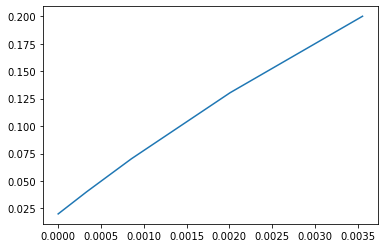

In [3]:
# Defining Opertaing line

def op(x):
    
    y = ((L_p/V_p)*(x/(1-x)) + a2 - (L_p/V_p)*a4)/(1 + ((L_p/V_p)*(x/(1-x)) + a2 - (L_p/V_p)*a4))
    
    return y

# ploting data
# x = np.linspace(x2,x1,5)
x = [x2,0.000332,0.000855,0.00201,x1]
Y = np.empty(len(x))
for i in range(len(x)):
    Y[i]=op(x[i])
    
plt.plot(x,Y)



In [61]:
## total liquid and gas in kg as Gy and Gx

G_y=np.empty(len(Y))
G_x=np.empty(len(x))
L=np.empty(len(Y))
V=np.empty(len(Y))

for i in range(len(Y)):
    G_y[i] = (V_p*Mw_air + V_p*(Y[i]/(1-Y[i]))*Mw_s)/cross_section_area
    G_x[i] = (L_p*Mw_water + L_p*(x[i]/(1-x[i]))*Mw_s)/cross_section_area
    
    V[i] = V_p/(1-Y[i])
    L[i] = L_p/(1-x[i])

    

In [62]:
## calculating K'x a and K'y a 

k_p_x_a = np.empty(len(G_x)) # K'x a 
k_p_y_a = np.empty(len(G_x)) # K'y a

for i in range(len(G_x)):
    
    k_p_x_a[i] = 0.152 * G_x[i]**(0.82)
    k_p_y_a[i] = 0.0594 * G_y[i]**(0.7) * G_x[i]**(0.25)
    





In [71]:
# the interface compositions yi and xi must be determined, xi and yi

xi = [0.0046,0.00103,0.00185,0.00355,0.00565]
yi = [0.009,0.0235,0.0476,0.1015,0.1685]
y_yi = np.empty(len(yi))
for i in range(len(yi)):
    y_yi[i] = Y[i] - yi[i]
    
Y_1_im = [0.985,0.968,0.941,0.885,0.816] # (1-y)iM


## 1-y
y_1 = np.empty(len(Y))

for i in range(len(Y)):
    y_1[i] = 1-Y[i]
    


In [75]:
# defining integral equation for Z

f = np.empty(len(y_yi))
for i in range(len(y_yi)):
    
    f[i] = (V[i]*Y_1_im[i])/(k_p_y_a[i]*cross_section_area*y_1[i]*y_yi[i])


In [88]:
## Numericall integrating over data

Z = integrate.simps(f,x=Y, dx=1, axis=-1, even='avg')

print('Z = ' + str(Z))

Z = 1.5639905346993486
